In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
import requests
import pandas as pd
from io import BytesIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data using requests
response = requests.get(URL)
response.raise_for_status()  # Check for errors

# Use BytesIO to create a file-like object
text = BytesIO(response.content)

# Read the CSV into a DataFrame
df = pd.read_csv(text)

# Display the DataFrame
print('Data downloaded and read into a dataframe!')
df.head()

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [8]:
df.shape

(528, 15)

# 1.1. Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

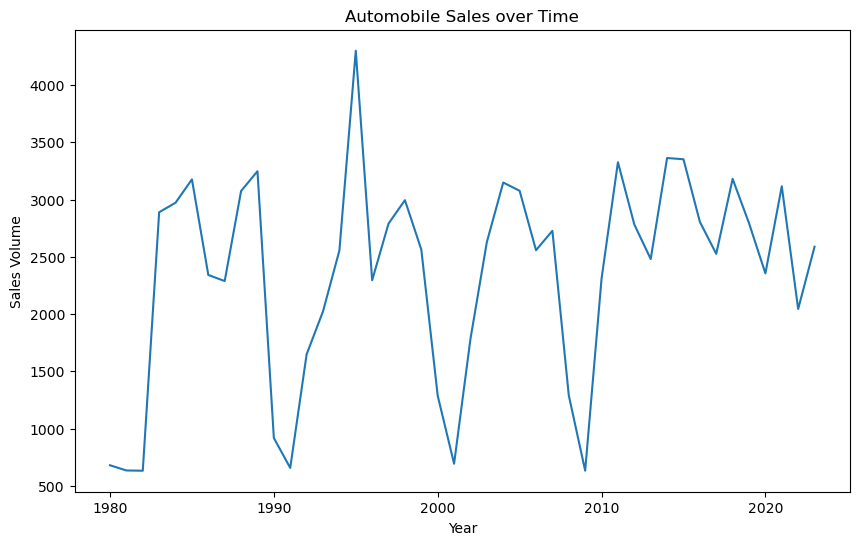

In [9]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

In [10]:
df_line

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

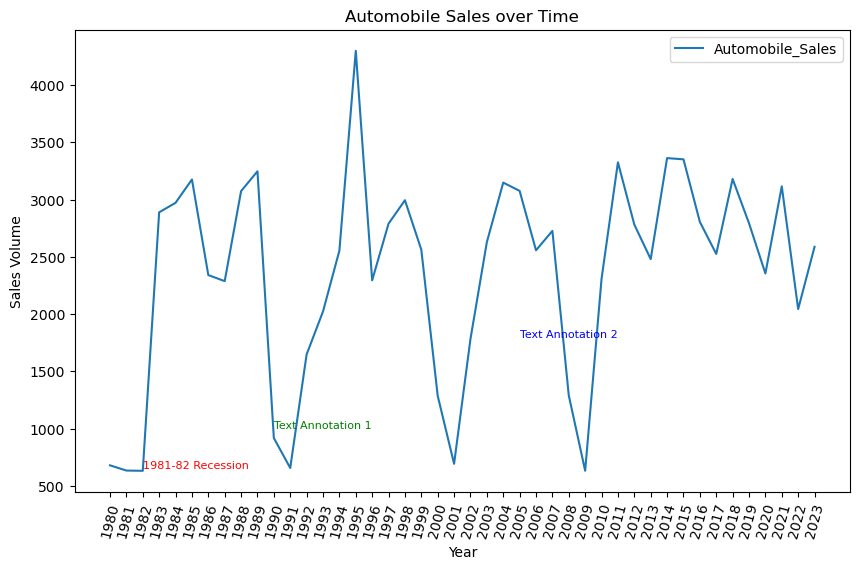

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981-82 Recession', fontsize=8, color='red')

# Add additional text annotations
plt.text(1990, 1000, 'Text Annotation 1', fontsize=8, color='green')
plt.text(2005, 1800, 'Text Annotation 2', fontsize=8, color='blue')

plt.legend()
plt.show()

# TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

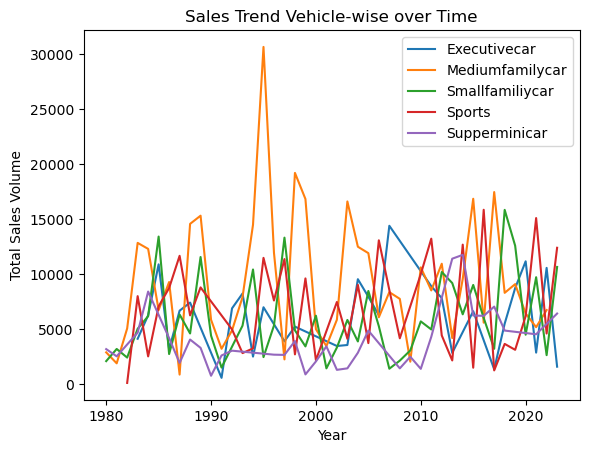

In [13]:
import matplotlib.pyplot as plt

df_Mline = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.title('Sales Trend Vehicle-wise over Time')
plt.legend()
plt.show()

# TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

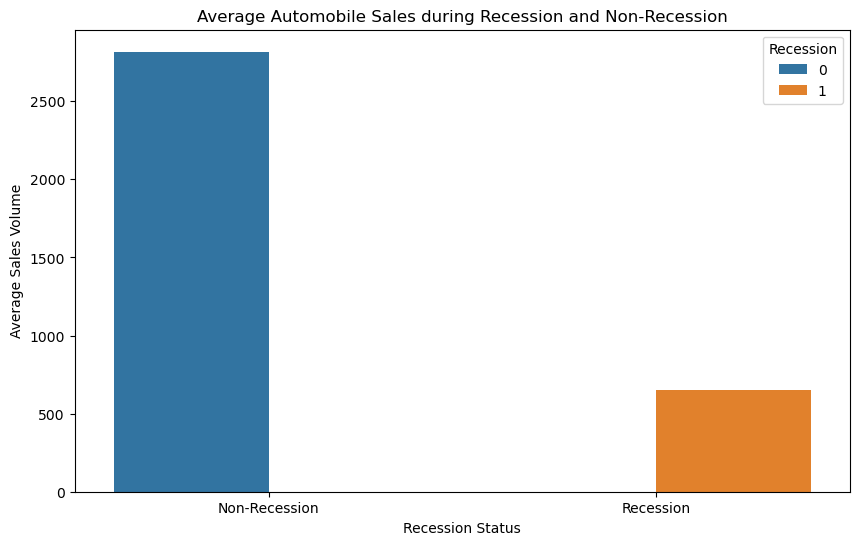

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of 'Automobile_Sales' during Recession and Non-Recession
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession Status')
plt.ylabel('Average Sales Volume')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

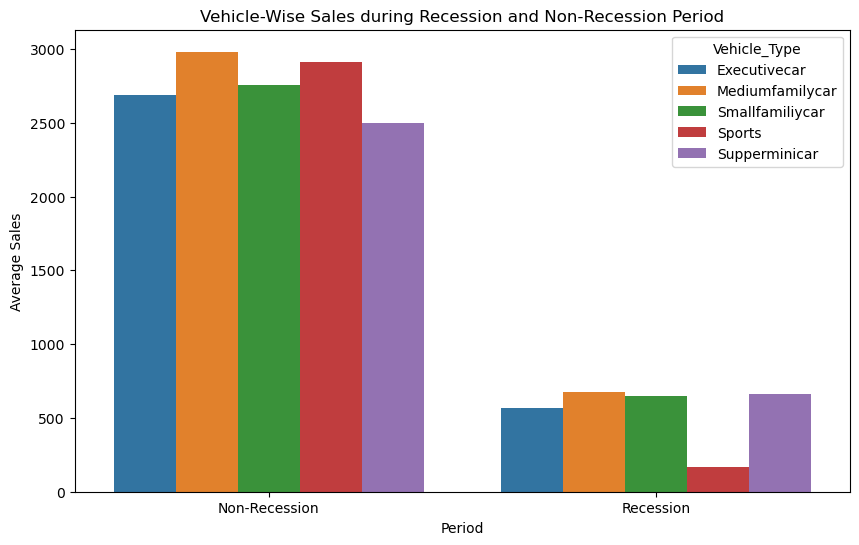

In [15]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

# TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

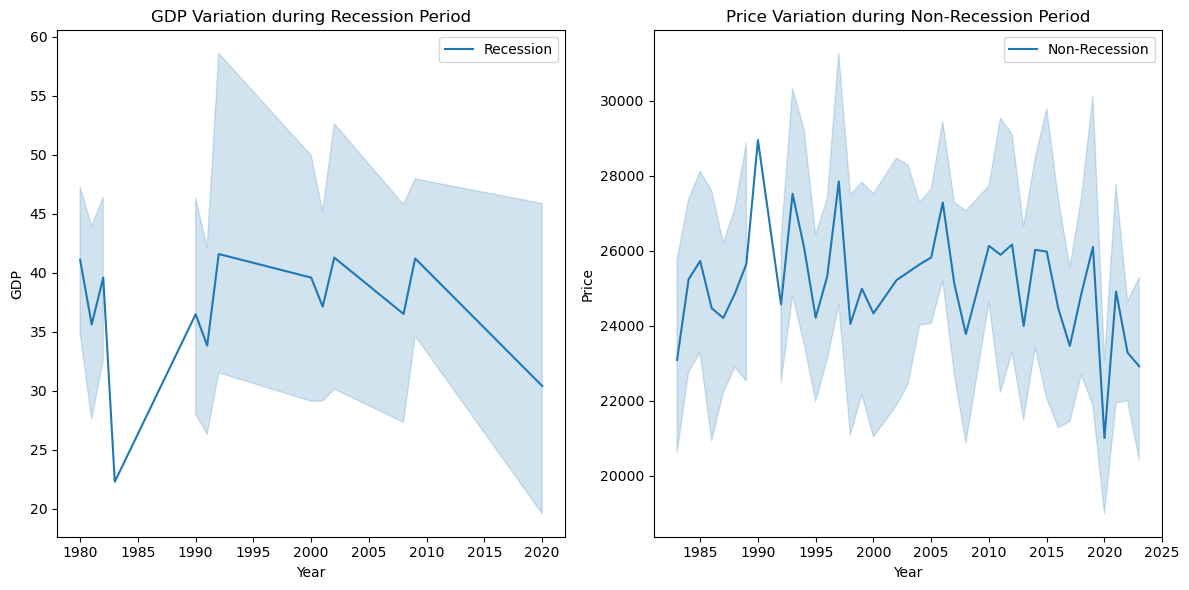

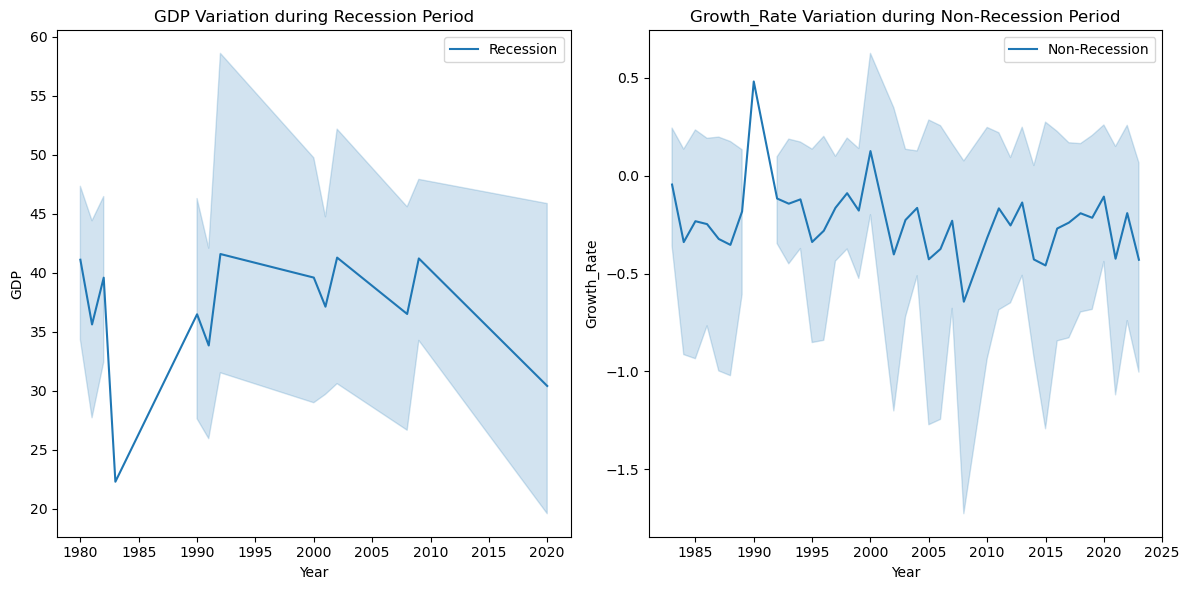

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot).

# Subplot 1: GDP Variation during Recession Period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2: Customize the parameters based on your dataset
sns.lineplot(x='Year', y='Price', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.set_title('Price Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

# Alternatively, using subplot()
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot 2: Customize the parameters based on your dataset
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Growth_Rate', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('Growth_Rate')
plt.title('Growth_Rate Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

# TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

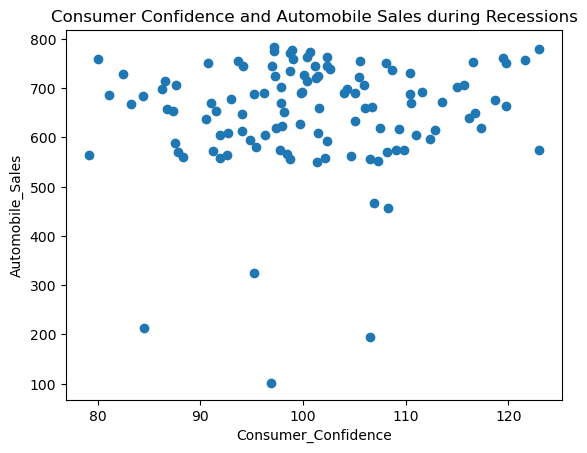

In [20]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

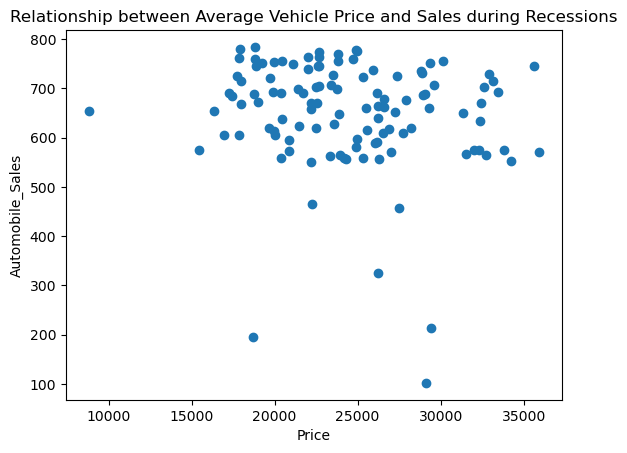

In [22]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

# TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

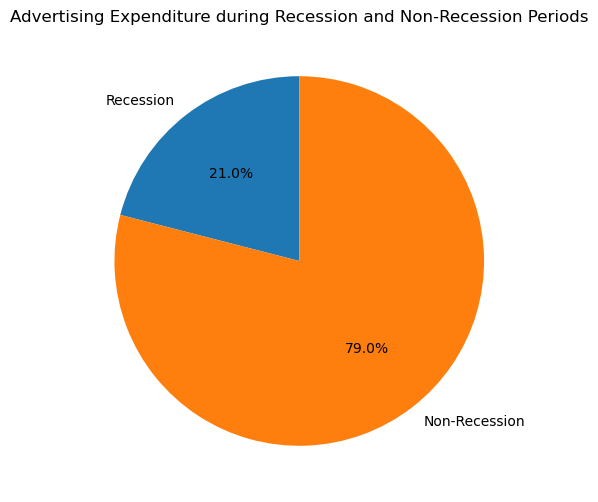

In [24]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]  # Fix the variable name here
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

# TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

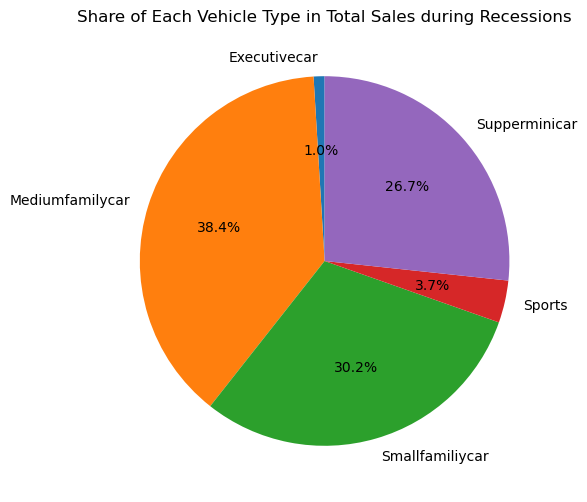

In [25]:
 # Filter the data 
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

# TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.¶

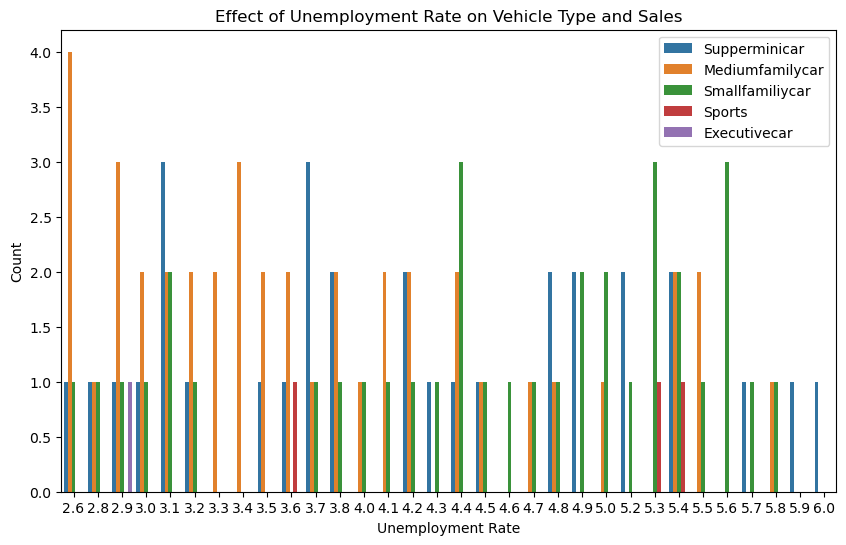

In [26]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

# TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [30]:
pip install pyodide

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\HP\AppData\Local\Temp\pip-install-f0cyd_4u\pyodide_e5c7d579479c400cab583494bc241067\setup.py", line 7, in <module>
      raise ValueError(
  ValueError: Pyodide is a Python distribution that runs in the browser or Node.js. It cannot be installed from PyPi.
              See https://github.com/pyodide/pyodide for how to use Pyodide.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [33]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

ModuleNotFoundError: No module named 'pyodide'

In [34]:
import folium

# Filter the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-cities.json',  # GeoJSON file with city boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.city_name',  # Adjust this based on your GeoJSON structure
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['city_name', 'Automobile_Sales'], labels=True)
)

# Display the map
map1

FileNotFoundError: [Errno 2] No such file or directory: 'us-cities.json'